In [10]:
import numpy as np
import cv2
import glob
import matplotlib.pyplot as plt
%matplotlib qt

X_CORNERS = 9
Y_CORNERS = 6
objp = np.zeros((Y_CORNERS*X_CORNERS, 3), np.float32)
objp[:,:2] = np.mgrid[0:X_CORNERS, 0:Y_CORNERS].T.reshape(-1, 2)

obj_points = []
img_points = []

images = glob.glob("camera_cal/calibration*.jpg")
img_h, img_w = None, None
for fname in images:
  img = cv2.imread(fname)
  gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  img_h, img_w = gray.shape[0], gray.shape[1]
  ret, corners = cv2.findChessboardCorners(gray, (X_CORNERS, Y_CORNERS), None)
  if ret:
    obj_points.append(objp)
    img_points.append(corners)
    img = cv2.drawChessboardCorners(img, (X_CORNERS, Y_CORNERS), corners, ret)
    cv2.imshow("img", img)
    cv2.waitKey(200)
cv2.destroyAllWindows()

In [17]:
import pickle
%matplotlib inline

ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(obj_points, img_points,
                                                   (img_w, img_h), None,None)
my_pickle = {}
my_pickle["mtx"] = mtx
my_pickle["dist"] = dist
pickle.dump(my_pickle, open("camera_calibration.p", "wb"))

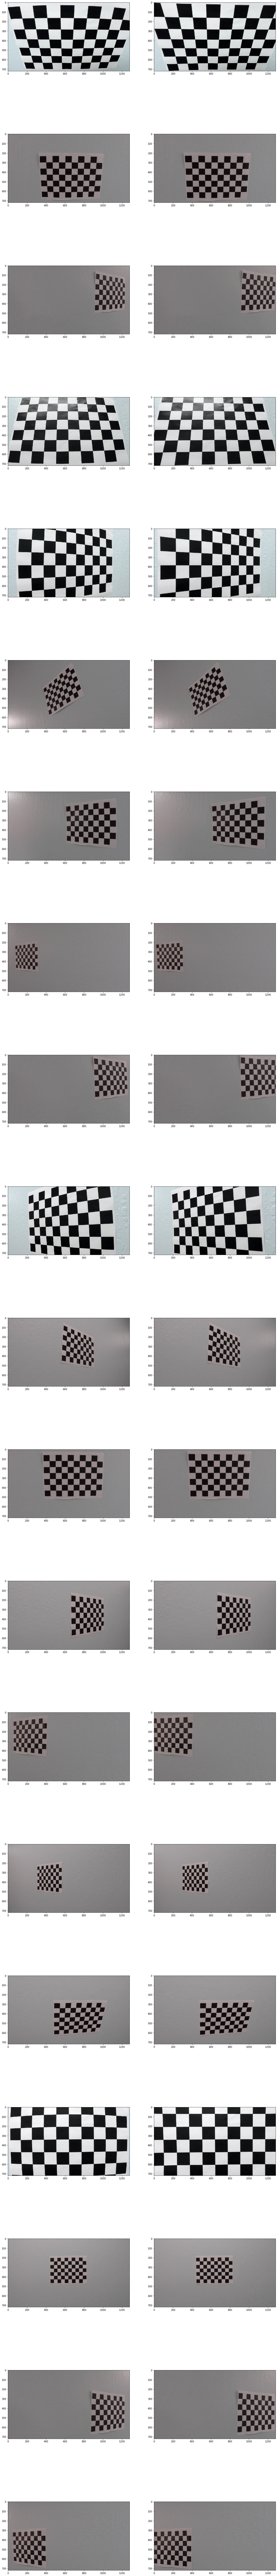

In [15]:
import os.path

fig, axes = plt.subplots(len(images), 2, figsize=(20, 10 * len(images)))
for i, fname in enumerate(images):
  img = cv2.imread(fname)
  dst_img = cv2.undistort(img, mtx, dist, None, mtx)
  base = os.path.basename(fname).replace(".jpg", "")
  dst_name = "output_images/" + base + "_undistorted.jpg"
  cv2.imwrite(dst_name, dst_img)
  axes[i, 0].imshow(img)
  axes[i, 1].imshow(dst_img)
